# Storing Tidy Data

`students_cleaned.csv` is the tidy data that was generated from Week 11's exercise. Below is a sample of the dataset:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

students_df = pd.read_csv('students_cleaned.csv')
students_df.sample(10)

,student_id,name,quarter,grade,year_entered,major,specialization
318,2019-19,Nicholas Curry,Q4,84,2019,engineering,computer
381,2019-82,Anthony George,Q4,84,2019,engineering,mechatronics
327,2019-28,Rachel Wang,Q4,97,2019,artificial-intelligence,natural-language-processing
55,2019-56,Thomas Barnes,Q1,76,2019,engineering,electronics
97,2019-98,John Torres,Q1,89,2019,engineering,mechanical
253,2019-54,Heather Beck,Q3,85,2019,engineering,civil
321,2019-22,Jeremy Smith,Q4,74,2019,engineering,electronics
129,2019-30,Jonathan Davis,Q2,87,2019,engineering,civil
26,2019-27,Daniel Perez,Q1,76,2019,artificial-intelligence,expert-systems
269,2019-70,Elizabeth Roberson,Q3,73,2019,engineering,mechanical


#### Here is a description of the following columns:

- `student_id` - student's identification number
- `name` - full name of the student
- `quarter` - quarter of observation
- `grade` - grade of student that quarter
- `year_entered` - year student entered the college
- `major` - student's major
- `specialization` - student's specialization

## Exercise 1: Split the `students_df` into two dataframes:

1. `students_information_df`
    Fields:
    - `student_id`
    - `name`
    - `year_entered`
    - `major`
    - `specialization`

2. `students_grades_df`
    - `student_id`
    - `quarter`
    - `grade`

In [2]:
# Split student df here

students_information_df = students_df[['student_id','name','year_entered','major','specialization']].drop_duplicates()
print(students_information_df.shape)

students_grades_df = students_df[['student_id','quarter','grade']].drop_duplicates()
print(students_grades_df.shape)

(100, 5)
(400, 3)


## Merge back test:

In [4]:
students_merged = pd.merge(students_grades_df,
                   students_information_df,
                   on="student_id",
                   how='left')
students_merged

,student_id,quarter,grade,name,year_entered,major,specialization
0,2019-1,Q1,95,Hector Henderson,2019,engineering,computer
1,2019-2,Q1,74,Michael Williams,2019,engineering,computer
2,2019-3,Q1,99,Michael Mcmillan,2019,engineering,civil
3,2019-4,Q1,85,Jason Wright,2019,artificial-intelligence,expert-systems
4,2019-5,Q1,87,David Dixon,2019,engineering,computer
5,2019-6,Q1,84,Molly Mcdonald,2019,engineering,electrical
6,2019-7,Q1,87,Mark Harvey,2019,engineering,computer
7,2019-8,Q1,93,Matthew Wilson,2019,engineering,computer
8,2019-9,Q1,72,Seth Johnson,2019,engineering,mechanical
9,2019-10,Q1,86,Katie Austin,2019,artificial-intelligence,computer-vision


## Exercise 2: Evaluate the best performing quarter for the students

In order to finish this exercise, we need to use a another process for subsetting data in `pandas` called boolean indexing. In boolean indexing, we filter out our rows based on `True` or `False` values. For example we have a matrix A:

In [3]:
x = np.arange(1,7)
y = x*2
table = {
    'x': x,
    'y': y,
}
A = pd.DataFrame(table)
A

,x,y
0,1,2
1,2,4
2,3,6
3,4,8
4,5,10
5,6,12


We can get a `Series` of rows where the value of  the column of `x` is less than or equal to 3 by:

In [4]:
A['x'] <= 3

0     True
1     True
2     True
3    False
4    False
5    False
Name: x, dtype: bool

The series will be composed of `True` and `False` values based on our boolean expression. We can use this expression to extract the values of `x` that has a corresponding `True` value by enclosing the boolean expression inside the `A` DataFrame by square brackets:

In [5]:
A[ A['x'] <= 3 ] 

,x,y
0,1,2
1,2,4
2,3,6


In our `students_df` DataFrame, we can extract all the rows having the quarter `Q1` by doing:

In [6]:
q1_df = students_df[ students_df['quarter'] == 'Q1' ]
q1_df

,student_id,name,quarter,grade,year_entered,major,specialization
0,2019-1,Hector Henderson,Q1,95,2019,engineering,computer
1,2019-2,Michael Williams,Q1,74,2019,engineering,computer
2,2019-3,Michael Mcmillan,Q1,99,2019,engineering,civil
3,2019-4,Jason Wright,Q1,85,2019,artificial-intelligence,expert-systems
4,2019-5,David Dixon,Q1,87,2019,engineering,computer
5,2019-6,Molly Mcdonald,Q1,84,2019,engineering,electrical
6,2019-7,Mark Harvey,Q1,87,2019,engineering,computer
7,2019-8,Matthew Wilson,Q1,93,2019,engineering,computer
8,2019-9,Seth Johnson,Q1,72,2019,engineering,mechanical
9,2019-10,Katie Austin,Q1,86,2019,artificial-intelligence,computer-vision


### Using the examples above, create DataFrames divided and put them into the following variables respectively: `q2_df`, `q3_df`, `q4_df`

In [7]:
# code here
q2_df = students_df[ students_df['quarter'] == 'Q2' ]

q3_df = students_df[ students_df['quarter'] == 'Q3' ]

q4_df = students_df[ students_df['quarter'] == 'Q4' ]

### Create a 2x2 subplot. Each subplot should contain a histogram showing the frequency of scores the students have got per quarter

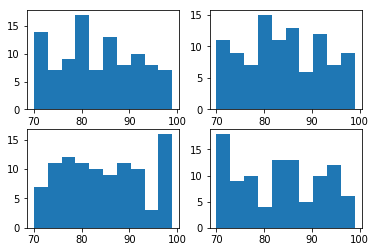

In [8]:
# code here
plt.subplot(2,2,1)
plt.hist(q1_df['grade'])

plt.subplot(2,2,2)
plt.hist(q2_df['grade'])

plt.subplot(2,2,3)
plt.hist(q3_df['grade'])

plt.subplot(2,2,4)
plt.hist(q4_df['grade'])
plt.show()

### Based on the histograms above, what quarter did the majority of the students perform best? Explain your answer in a Python comment below:

From visual analysis of the Histograms of Q1,Q2,Q3 and Q4, Q3 seems to be the best performing quarter of for the students as it can be seen the the frequency of students who had a grade of close to 100 are more than 15. In contrast, Q4 looks to be the worst performing quarter due to the frequency of students that scored a grade near 70 which is more than 15.

## Assertion tests
Run the code below to check if there is anything missing in your implementation. The following code below checks for:
- shape of `students_information_df` should be 100x5
- shape of `students_grades_df` should be 400x3
- existence of `student_id`, `name`, `year_entered`, `major` and `specialization` inside the `students_information_df` dataframe
- existence of `student_id`, `quarter`, and `grade` inside the `students_grades_df` dataframe

In [10]:
assert 'student_id' in students_information_df.columns, "student_id column does not exist in students_information_df"
assert 'name' in students_information_df.columns, "name column does not exist in students_information_df"
assert 'year_entered' in students_information_df.columns, "year_entered column does not exist in students_information_df"
assert 'major' in students_information_df.columns, "major column does not exist in students_information_df"
assert 'specialization' in students_information_df.columns, "specialization column does not exist in students_information_df"

assert 'student_id' in students_grades_df.columns, "student_id column does not exist in students_grades_df"
assert 'quarter' in students_grades_df.columns, "quarter column does not exist in students_grades_df"
assert 'grade' in students_grades_df.columns, "grade column does not exist in students_grades_df"

assert students_information_df.shape == (100, 5), "Dataframe's shape does not match expected shape"
assert students_grades_df.shape == (400, 3), "Dataframe's shape does not match expected shape"
